# Libraries

In [1]:
# packages for data manipulation and analysis
import pandas as pd  # For data manipulation and handling files
import numpy as np  # For numerical operations

# Packages for modeling and machine learning
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize/scale the data
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.cluster import KMeans  # For K-means clustering
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination (stepwise regression)
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import r2_score  # To evaluate the model performance using R-squared
import statsmodels.api as sm

# Packages for association rules and frequent itemset mining
from mlxtend.frequent_patterns import apriori, association_rules  # For Apriori algorithm and association rule generation

# Visualization libraries
import matplotlib.pyplot as plt  # For general plotting and visualization
import seaborn as sns  # For more advanced statistical plotting

# Data Preparation

Cleaning the dataset

In [2]:
# Load the dataset

data = pd.read_csv("Practice Data.csv")
data.head(10)

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,Condition,Price
0,15200,52400,0.26,695,0,0,1,0,0,2,2,1,50.8,0,Average,74818
1,16100,123300,0.28,1054,450,180,2,0,1,3,2,1,30.8,0,Good,137462
2,17900,63900,0.50,891,0,180,1,0,0,2,3,0,53.8,576,Average,56850
3,25400,132400,0.26,1080,450,64,2,0,1,3,2,1,30.9,330,Good,137462
4,23000,99800,0.18,1020,500,0,2,0,1,3,2,1,30.7,0,Good,131008
5,25900,118100,0.29,1317,0,100,2,1,0,3,2,1,16.7,400,Average,139973
6,23000,119100,0.26,1802,360,0,1,0,1,3,4,1,68.0,0,Good,141880
7,9700,60200,0.13,720,0,0,1,0,0,2,2,0,54.7,0,Average,69408
8,21700,70000,0.28,912,0,0,1,0,0,2,2,0,62.9,0,Average,92492
9,13600,70200,0.13,1019,0,310,1,0,0,3,2,1,48.7,0,Good,109318


In [3]:
# Check for missing values 

missing_values = data.isnull().sum()
missing_values

LandValue        0
BuildingValue    0
Acres            0
AboveSpace       0
Basement         0
Deck             0
Baths            0
Toilets          0
Fireplaces       0
Beds             0
Rooms            0
AC               0
Age              0
Car              0
Condition        0
Price            0
dtype: int64

In [4]:
# impute and fill in missing data if necessary

# for this data there is no missing values so we will proceed
cdata = data.fillna(0)
cdata.head(10)

# this code will impute the mean if necessary
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#data_imputed = pd.DataFrame(imputer.fit_transform(data[columns='']), columns='')
#data_imputed.head()

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,Condition,Price
0,15200,52400,0.26,695,0,0,1,0,0,2,2,1,50.8,0,Average,74818
1,16100,123300,0.28,1054,450,180,2,0,1,3,2,1,30.8,0,Good,137462
2,17900,63900,0.50,891,0,180,1,0,0,2,3,0,53.8,576,Average,56850
3,25400,132400,0.26,1080,450,64,2,0,1,3,2,1,30.9,330,Good,137462
4,23000,99800,0.18,1020,500,0,2,0,1,3,2,1,30.7,0,Good,131008
5,25900,118100,0.29,1317,0,100,2,1,0,3,2,1,16.7,400,Average,139973
6,23000,119100,0.26,1802,360,0,1,0,1,3,4,1,68.0,0,Good,141880
7,9700,60200,0.13,720,0,0,1,0,0,2,2,0,54.7,0,Average,69408
8,21700,70000,0.28,912,0,0,1,0,0,2,2,0,62.9,0,Average,92492
9,13600,70200,0.13,1019,0,310,1,0,0,3,2,1,48.7,0,Good,109318


In [8]:
# Recode AC as a flag variable (0 and 1) and Condition as categorical with 'Poor' as the baseline

cdata['AC'] = cdata['AC'].astype('category') # AC

cdata['Condition'] = cdata['Condition'].astype('category') # Condition
cdata['Condition'] = cdata['Condition'].cat.reorder_categories(['Poor', 'Average', 'Good'], ordered=True) # Order baseline

# Display the first 10 rows to confirm changes
print(cdata.head(10))

# Now you can run continuous descriptive statistics for continuous variables
print("\nContinuous Descriptive Statistics:")
print(cdata.describe())

# Run descriptive statistics for categorical variables
print("\nCategorical Descriptive Statistics:")
print(cdata.describe(include=['category']))

   LandValue  BuildingValue  Acres  AboveSpace  Basement  Deck  Baths  \
0      15200          52400   0.26         695         0     0      1   
1      16100         123300   0.28        1054       450   180      2   
2      17900          63900   0.50         891         0   180      1   
3      25400         132400   0.26        1080       450    64      2   
4      23000          99800   0.18        1020       500     0      2   
5      25900         118100   0.29        1317         0   100      2   
6      23000         119100   0.26        1802       360     0      1   
7       9700          60200   0.13         720         0     0      1   
8      21700          70000   0.28         912         0     0      1   
9      13600          70200   0.13        1019         0   310      1   

   Toilets  Fireplaces  Beds  Rooms AC   Age  Car Condition   Price  
0        0           0     2      2  1  50.8    0   Average   74818  
1        0           1     3      2  1  30.8    0      G

In [9]:
# Summary Variable Stats

constats = cdata.describe()
constats

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,Age,Car,Price
count,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000
mean,21635.133233,90276.395173,0.223467,1151.394419,119.667672,74.558069,1.251131,0.221719,0.285571,2.679487,2.686526,64.029211,69.772499,57779.887129
std,10723.218476,45007.161203,0.177030,420.885002,226.180729,123.607591,0.494912,0.435548,0.503344,0.756889,0.882327,34.191570,167.686951,69169.419597
min,2300.000000,4700.000000,0.050000,412.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,15400.000000,60500.000000,0.160000,864.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,49.225000,0.000000,0.000000
50%,20100.000000,83400.000000,0.180000,1048.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,61.800000,0.000000,0.000000
75%,26600.000000,109475.000000,0.230000,1352.000000,200.000000,128.000000,1.000000,0.000000,1.000000,3.000000,3.000000,86.500000,0.000000,112789.000000
max,132900.000000,576600.000000,5.570000,5112.000000,1842.000000,1476.000000,4.000000,2.000000,3.000000,7.000000,8.000000,1375.700000,1000.000000,664874.000000


In [10]:
catstats = cdata.select_dtypes(include=['category']).describe()
catstats

,AC,Condition
count,3978,3978
unique,2,3
top,1,Good
freq,3100,2550


# Association Rules

In [11]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Example: Use only categorical or flag-like variables for association rule analysis
binary_data = pd.get_dummies(cdata[['AC', 'Condition']])

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(binary_data, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    support                   itemsets
0  0.220714                     (AC_0)
1  0.779286                     (AC_1)
2  0.292609        (Condition_Average)
3  0.641026           (Condition_Good)
4  0.213172  (Condition_Average, AC_1)
5  0.544746     (Condition_Good, AC_1)
           antecedents       consequents   support  confidence      lift
0  (Condition_Average)            (AC_1)  0.213172    0.728522  0.934859
1     (Condition_Good)            (AC_1)  0.544746    0.849804  1.090490
2               (AC_1)  (Condition_Good)  0.544746    0.699032  1.090490


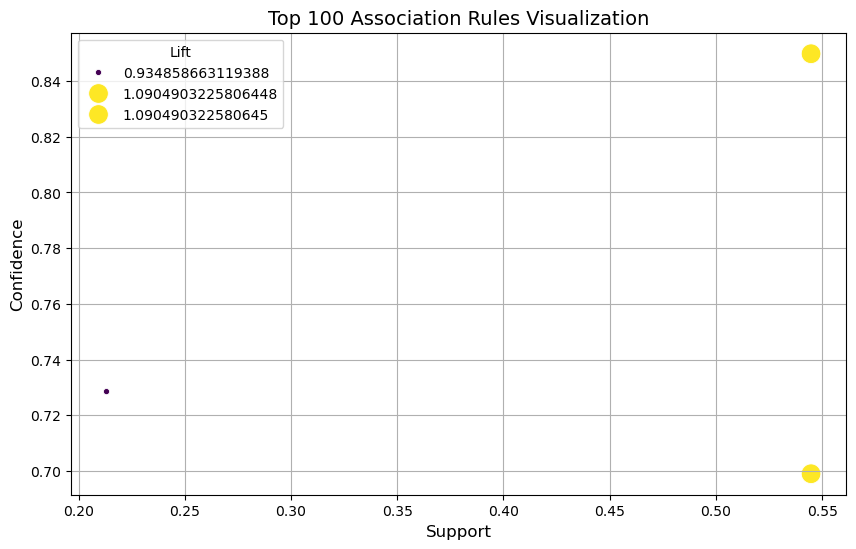

In [13]:
# Select the top 100 rules based on Lift
top_100_rules = rules.nlargest(100, 'lift')

# Plot the rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=top_100_rules, palette='viridis', sizes=(20, 200))
plt.title('Top 100 Association Rules Visualization', fontsize=14)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.legend(loc='best', title="Lift")
plt.grid(True)
plt.show()

In [14]:
binary_data.head()

,AC_0,AC_1,Condition_Poor,Condition_Average,Condition_Good
0,False,True,False,True,False
1,False,True,False,False,True
2,True,False,False,True,False
3,False,True,False,False,True
4,False,True,False,False,True


# Predictor's Creation

- PCA
- Clustering (K-Means)

In [15]:
# Splitting the data into testing and training sets

X = cdata.drop(columns=['Price'])  # Predictors
y = cdata['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

PCA

In [16]:
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#import pandas as pd

# Scale the predictors before PCA
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))

# Apply PCA
pca = PCA(n_components=0.9)  # Retain 90% variance
pca_train = pca.fit_transform(scaled_X_train)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Component loadings (relationship between components and original variables)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
                        index=X_train.select_dtypes(include=['float64', 'int64']).columns)

# Display the loadings clearly
print("Principal Component Loadings (Original Variables' Contribution to Principal Components):")
print(loadings)

# You can also display the variance explained by each component
explained_variance_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})
print("\nVariance Explained by Each Principal Component:")
print(explained_variance_df)

Principal Component Loadings (Original Variables' Contribution to Principal Components):
                    PC1       PC2       PC3       PC4       PC5       PC6  \
LandValue      0.332652  0.049444  0.414467 -0.096651  0.016644 -0.026319   
BuildingValue  0.420764 -0.017981 -0.036712 -0.009193 -0.016030 -0.021583   
Acres          0.151470  0.031144  0.789808 -0.141250 -0.223959  0.178758   
AboveSpace     0.370658  0.347597 -0.120382  0.000825 -0.121304  0.124678   
Basement       0.195781 -0.360170 -0.107789 -0.053194 -0.018309 -0.233313   
Deck           0.153634 -0.211014  0.118311  0.891894  0.139545  0.278522   
Baths          0.325692 -0.084932 -0.167116  0.088789 -0.445406 -0.236033   
Toilets        0.256062  0.044816 -0.072413 -0.236482  0.715444  0.310925   
Fireplaces     0.297453  0.116358  0.035981 -0.014834  0.307510 -0.350758   
Beds           0.264363  0.128509 -0.338340 -0.144974 -0.324971  0.603787   
Rooms          0.177480  0.541441 -0.078959  0.268896  0.053726 

In [17]:
# Calculate the cumulative variance explained by the components
cumulative_variance = explained_variance.cumsum()

# Check how many components explain at least 50% variance
n_components_50_variance = (cumulative_variance >= 0.50).argmax() + 1

# Display the cumulative variance and the number of components
print(f"Number of components needed to explain at least 50% of the variance: {n_components_50_variance}")
print("Cumulative variance explained by the components:")
print(cumulative_variance)

Number of components needed to explain at least 50% of the variance: 3
Cumulative variance explained by the components:
[0.36676888 0.49006575 0.57423395 0.64283494 0.70748998 0.77080085
 0.83100732 0.87754649 0.91546017]


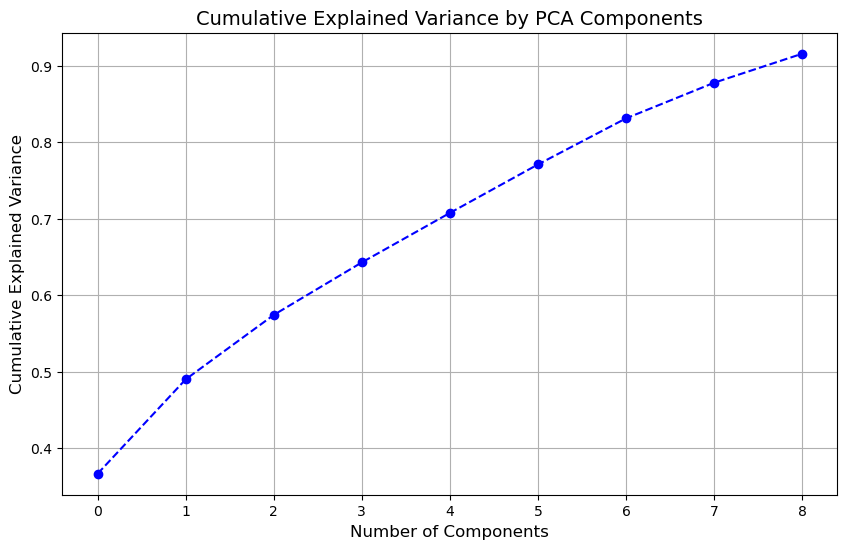

In [18]:
# Plot the explained variance of each PCA component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.show()

Clustering (K-Means)

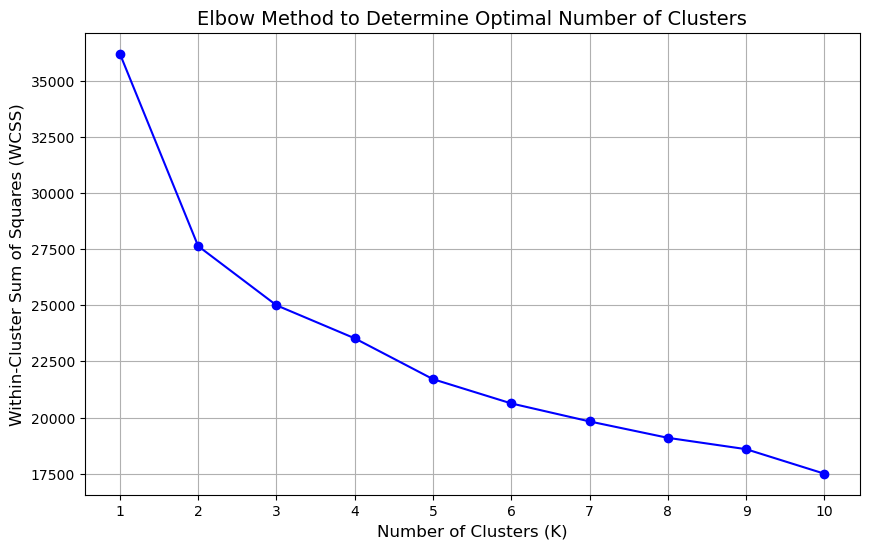

Inertia for 4 clusters: 23524.19440838102
Inertia for 5 clusters: 21707.039282560134


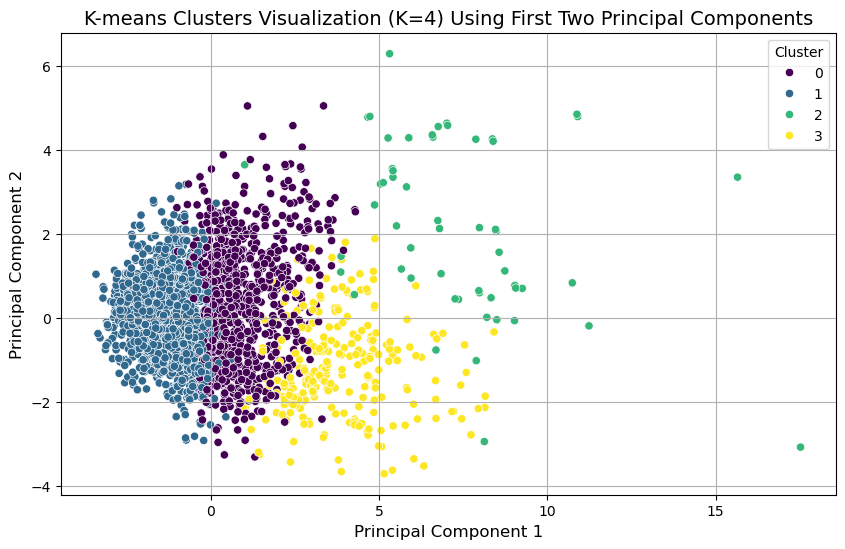

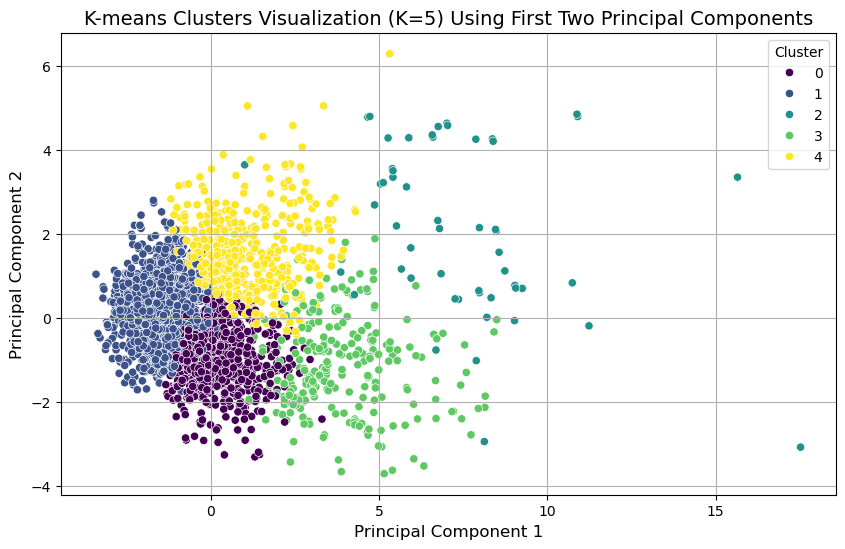

In [19]:
# Fit K-means clustering with 4 and 5 clusters
#kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(scaled_X_train)
#kmeans_5 = KMeans(n_clusters=5, random_state=42).fit(scaled_X_train)

#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt
#import seaborn as sns

# Scale the predictors before clustering
scaled_X_train = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))

# Use the Elbow method to find the optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X_train)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method to Determine Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

# K-Means with 4 Clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(scaled_X_train)
X_train_with_clusters_4 = X_train.copy()
X_train_with_clusters_4['Cluster'] = kmeans_4.labels_

# K-Means with 5 Clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42).fit(scaled_X_train)
X_train_with_clusters_5 = X_train.copy()
X_train_with_clusters_5['Cluster'] = kmeans_5.labels_

# Print inertia to compare the fit of 4 vs. 5 clusters
print(f'Inertia for 4 clusters: {kmeans_4.inertia_}')
print(f'Inertia for 5 clusters: {kmeans_5.inertia_}')

# Plot clusters for K=4 using PCA for visualization
pca_2d = PCA(n_components=2)
pca_train_2d = pca_2d.fit_transform(scaled_X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_train_2d[:, 0], y=pca_train_2d[:, 1], hue=X_train_with_clusters_4['Cluster'], palette='viridis')
plt.title('K-means Clusters Visualization (K=4) Using First Two Principal Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Plot clusters for K=5 using PCA for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_train_2d[:, 0], y=pca_train_2d[:, 1], hue=X_train_with_clusters_5['Cluster'], palette='viridis')
plt.title('K-means Clusters Visualization (K=5) Using First Two Principal Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Models - Regression

- Regression Model with Original Predictors
- Stepwise Regression
- PCA Regression

Regression Model with Original Predictors

In [20]:
#import statsmodels.api as sm

# Add constant term to predictors for OLS
X_train_const = sm.add_constant(X_train.select_dtypes(include=['float64', 'int64']))
X_test_const = sm.add_constant(X_test.select_dtypes(include=['float64', 'int64']))

# Fit the OLS regression model
model = sm.OLS(y_train, X_train_const).fit()

# Summary of the model
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test_const)

# Calculate R-squared on the test set
r2_original = r2_score(y_test, y_pred)
print(f'R-squared on test set: {r2_original}')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     51.62
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.76e-120
Time:                        08:22:57   Log-Likelihood:                -34703.
No. Observations:                2784   AIC:                         6.943e+04
Df Residuals:                    2770   BIC:                         6.952e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2494.6492   7271.123      0.343

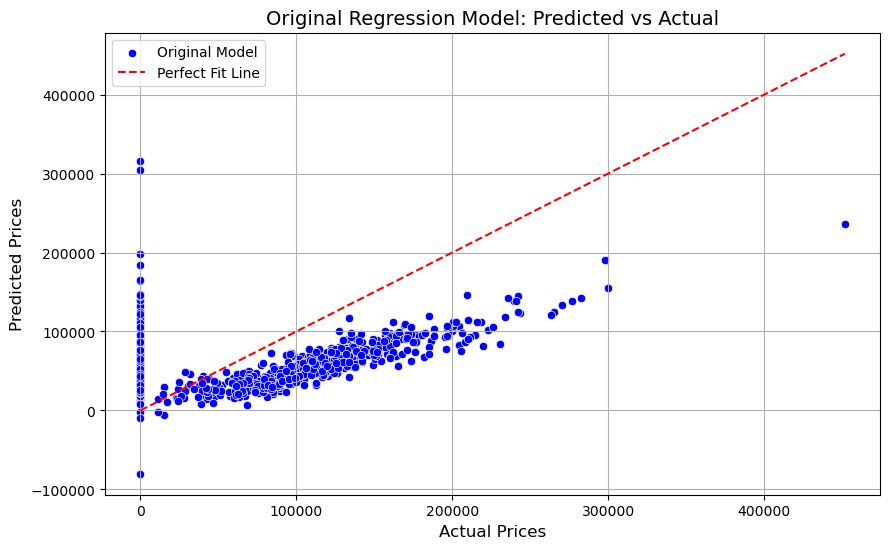

In [21]:
# Plot predicted vs actual for the Original Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Original Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit Line')
plt.title('Original Regression Model: Predicted vs Actual', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Original Predictors with cluster

In [22]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assume X_train and X_test are already defined from your original dataset split.

# One-hot encode categorical variables (AC and Condition)
X_train_encoded = pd.get_dummies(X_train, columns=['AC', 'Condition'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['AC', 'Condition'], drop_first=True)

# Scale the predictors
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_encoded)
scaled_X_test = scaler.transform(X_test_encoded)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels_train = kmeans.fit_predict(scaled_X_train)
kmeans_labels_test = kmeans.predict(scaled_X_test)

# Add clustering labels to the original dataset
X_train_with_clusters_orig = X_train_encoded.copy()
X_train_with_clusters_orig['Cluster'] = kmeans_labels_train

X_test_with_clusters_orig = X_test_encoded.copy()
X_test_with_clusters_orig['Cluster'] = kmeans_labels_test

# Scale the predictors again after adding the clustering variable
scaled_X_train_with_clusters_orig = scaler.fit_transform(X_train_with_clusters_orig)
scaled_X_test_with_clusters_orig = scaler.transform(X_test_with_clusters_orig)

# Add constant for intercept
scaled_X_train_with_clusters_orig = sm.add_constant(scaled_X_train_with_clusters_orig)
scaled_X_test_with_clusters_orig = sm.add_constant(scaled_X_test_with_clusters_orig)

# Fit OLS model with original variables and clustering
ols_model_with_clusters_orig = sm.OLS(y_train, scaled_X_train_with_clusters_orig).fit()

# Summary and R-squared
print(ols_model_with_clusters_orig.summary())
y_pred_with_clusters_orig = ols_model_with_clusters_orig.predict(scaled_X_test_with_clusters_orig)
r2_with_clusters_orig = r2_score(y_test, y_pred_with_clusters_orig)
print(f'R-squared for original model with clustering variable: {r2_with_clusters_orig}')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     39.94
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.99e-118
Time:                        08:23:01   Log-Likelihood:                -34700.
No. Observations:                2784   AIC:                         6.944e+04
Df Residuals:                    2766   BIC:                         6.954e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.733e+04   1190.828     48.144      0.0

Stepwise Regression

In [23]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

# Fit stepwise regression (using Recursive Feature Elimination)
model_lr = LinearRegression()
rfe = RFE(model_lr, n_features_to_select=5)
rfe.fit(X_train_const, y_train)

# Select important features
X_train_stepwise = X_train_const[X_train_const.columns[rfe.support_]]
X_test_stepwise = X_test_const[X_test_const.columns[rfe.support_]]

# Fit the model on selected features
model_stepwise = sm.OLS(y_train, X_train_stepwise).fit()

# Summary
print(model_stepwise.summary())

# Predict and calculate R-squared
y_pred_stepwise = model_stepwise.predict(X_test_stepwise)
r2_stepwise = r2_score(y_test, y_pred_stepwise)
print(f'R-squared for stepwise model: {r2_stepwise}')

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.471
Method:                 Least Squares   F-statistic:                              496.2
Date:                Fri, 04 Oct 2024   Prob (F-statistic):                        0.00
Time:                        08:23:04   Log-Likelihood:                         -34833.
No. Observations:                2784   AIC:                                  6.968e+04
Df Residuals:                    2779   BIC:                                  6.971e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

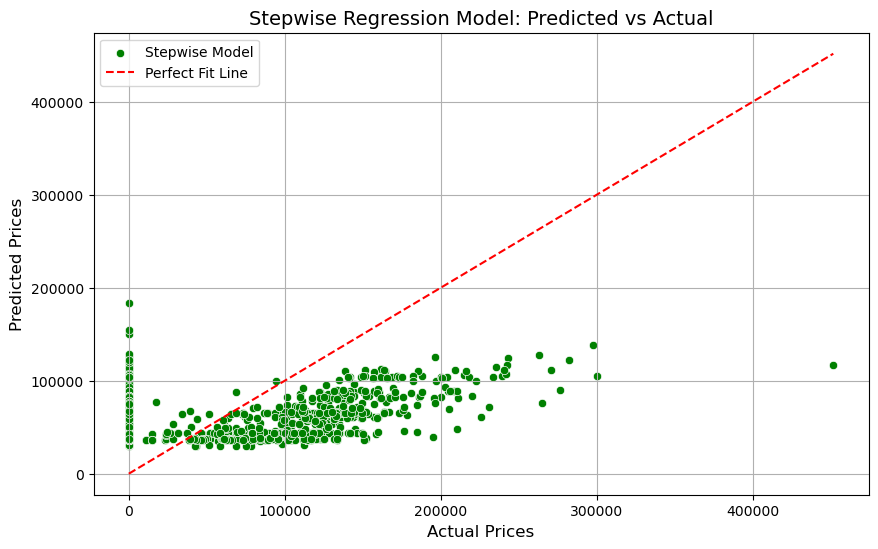

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_stepwise, color='green', label='Stepwise Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit Line')
plt.title('Stepwise Regression Model: Predicted vs Actual', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Stepwise with Cluster

In [25]:
# Add clustering labels to the stepwise dataset
X_train_with_clusters_stepwise = X_train_stepwise.copy()
X_train_with_clusters_stepwise['Cluster'] = kmeans_labels_train

X_test_with_clusters_stepwise = X_test_stepwise.copy()
X_test_with_clusters_stepwise['Cluster'] = kmeans_labels_test

# Scale the predictors again after adding the clustering variable
scaled_X_train_with_clusters_stepwise = scaler.fit_transform(X_train_with_clusters_stepwise)
scaled_X_test_with_clusters_stepwise = scaler.transform(X_test_with_clusters_stepwise)

# Add constant for intercept
scaled_X_train_with_clusters_stepwise = sm.add_constant(scaled_X_train_with_clusters_stepwise)
scaled_X_test_with_clusters_stepwise = sm.add_constant(scaled_X_test_with_clusters_stepwise)

# Fit OLS model for stepwise with clustering
ols_model_with_clusters_stepwise = sm.OLS(y_train, scaled_X_train_with_clusters_stepwise).fit()

# Summary and R-squared
print(ols_model_with_clusters_stepwise.summary())
y_pred_with_clusters_stepwise = ols_model_with_clusters_stepwise.predict(scaled_X_test_with_clusters_stepwise)
r2_with_clusters_stepwise = r2_score(y_test, y_pred_with_clusters_stepwise)
print(f'R-squared for stepwise model with clustering variable: {r2_with_clusters_stepwise}')


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     62.80
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           2.64e-73
Time:                        08:23:06   Log-Likelihood:                -34828.
No. Observations:                2784   AIC:                         6.967e+04
Df Residuals:                    2777   BIC:                         6.971e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.733e+04   1244.584     46.065      0.0

PCA Regression

In [26]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Scale the predictors before PCA
scaler = StandardScaler()

# Ensure both train and test have the same features
common_columns = X_train.columns.intersection(X_test.columns)
scaled_X_train = scaler.fit_transform(X_train[common_columns].select_dtypes(include=['float64', 'int64']))
scaled_X_test = scaler.transform(X_test[common_columns].select_dtypes(include=['float64', 'int64']))

# Apply PCA to retain 90% of the variance
pca = PCA(n_components=0.9)
pca_train = pca.fit_transform(scaled_X_train)
pca_test = pca.transform(scaled_X_test)

# Add constant to PCA components for regression
pca_train_with_const = sm.add_constant(pca_train)
pca_test_with_const = sm.add_constant(pca_test)

# Fit regression on PCA components
model_pca = sm.OLS(y_train, pca_train_with_const).fit()

# Summary of PCA regression
print(model_pca.summary())

# Predict and calculate R-squared
y_pred_pca = model_pca.predict(pca_test_with_const)
r2_pca = r2_score(y_test, y_pred_pca)
print(f'R-squared for PCA model: {r2_pca}')


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     70.77
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          7.68e-118
Time:                        08:23:06   Log-Likelihood:                -34717.
No. Observations:                2784   AIC:                         6.945e+04
Df Residuals:                    2774   BIC:                         6.951e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.733e+04   1196.753     47.906      0.0

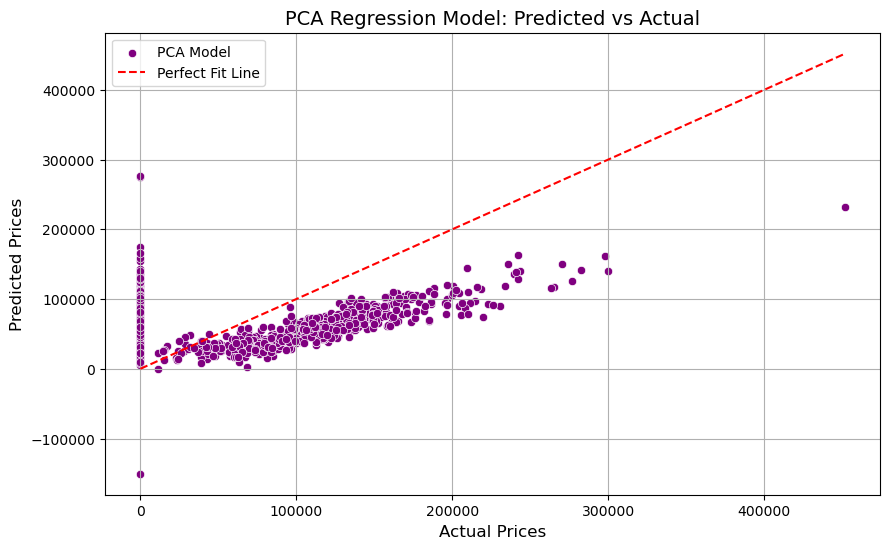

In [27]:
# Plot predicted vs actual for the PCA Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_pca, color='purple', label='PCA Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit Line')
plt.title('PCA Regression Model: Predicted vs Actual', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

PCA Regression with cluster variable

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Make sure clustering labels are added to both training and test sets before PCA
X_train_encoded_with_clusters = X_train_encoded.copy()
X_train_encoded_with_clusters['Cluster'] = kmeans_labels_train

X_test_encoded_with_clusters = X_test_encoded.copy()
X_test_encoded_with_clusters['Cluster'] = kmeans_labels_test

# Scale the data
scaler = StandardScaler()
scaled_X_train_with_clusters = scaler.fit_transform(X_train_encoded_with_clusters)
scaled_X_test_with_clusters = scaler.transform(X_test_encoded_with_clusters)

# Apply PCA (keep first 5 components as requested)
pca = PCA(n_components=5)
pca_train = pca.fit_transform(scaled_X_train_with_clusters)
pca_test = pca.transform(scaled_X_test_with_clusters)

# Add constant for intercept
pca_train_with_const = sm.add_constant(pca_train)
pca_test_with_const = sm.add_constant(pca_test)

# Fit the OLS regression model on PCA components
model_pca = sm.OLS(y_train, pca_train_with_const).fit()

# Summary of PCA regression
print(model_pca.summary())

# Predict and calculate R-squared
y_pred_pca = model_pca.predict(pca_test_with_const)
r2_pca = r2_score(y_test, y_pred_pca)
print(f'R-squared for PCA model: {r2_pca}')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     110.6
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          8.97e-107
Time:                        08:23:08   Log-Likelihood:                -34752.
No. Observations:                2784   AIC:                         6.952e+04
Df Residuals:                    2778   BIC:                         6.955e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.733e+04   1211.065     47.340      0.0

# Model Comparison

R-squared for Original Model: 0.1262994527059489
R-squared for Stepwise Model: 0.08495762565394371
R-squared for PCA Model: 0.13505767676827507


C:\Users\Ianth\AppData\Local\Temp\ipykernel_27464\2558837435.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=model_comparison, palette='viridis')


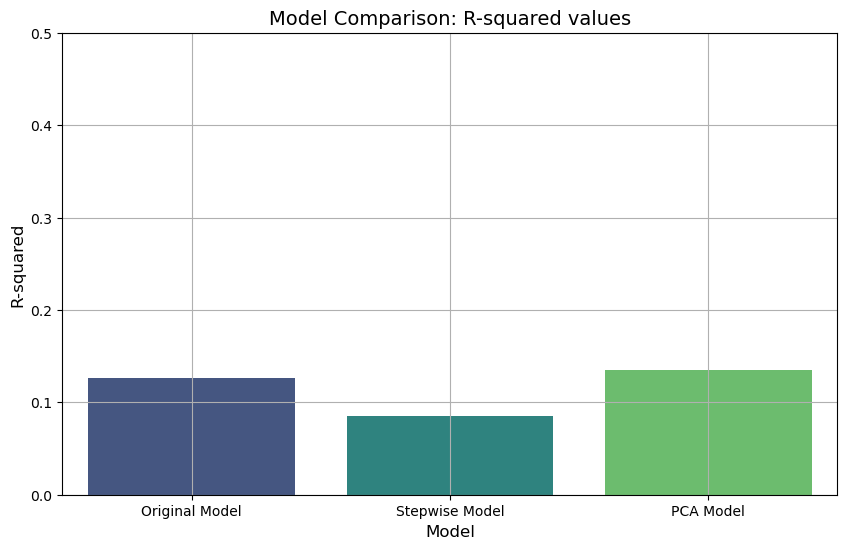

In [29]:
# Compare R-squared values for all three models
print(f'R-squared for Original Model: {r2_original}')
print(f'R-squared for Stepwise Model: {r2_stepwise}')
print(f'R-squared for PCA Model: {r2_pca}')

# Create a DataFrame to hold R-squared values for comparison
model_comparison = pd.DataFrame({
    'Model': ['Original Model', 'Stepwise Model', 'PCA Model'],
    'R-squared': [r2_original, r2_stepwise, r2_pca]
})

# Plot comparison of R-squared for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=model_comparison, palette='viridis')
plt.title('Model Comparison: R-squared values', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.ylim(0, 0.5)  # Scale the Y-axis to 0.5 for better display
plt.grid(True)
plt.show()

# Model Comparison with Cluster Variable

R-squared for Original Model with Cluster: 0.1251609375997058
R-squared for Stepwise Model with Cluster: 0.0903278159196601
R-squared for PCA Model with Cluster: 0.13505767676827507


C:\Users\Ianth\AppData\Local\Temp\ipykernel_27464\3023552394.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=model_comparison_with_clusters, palette='viridis')


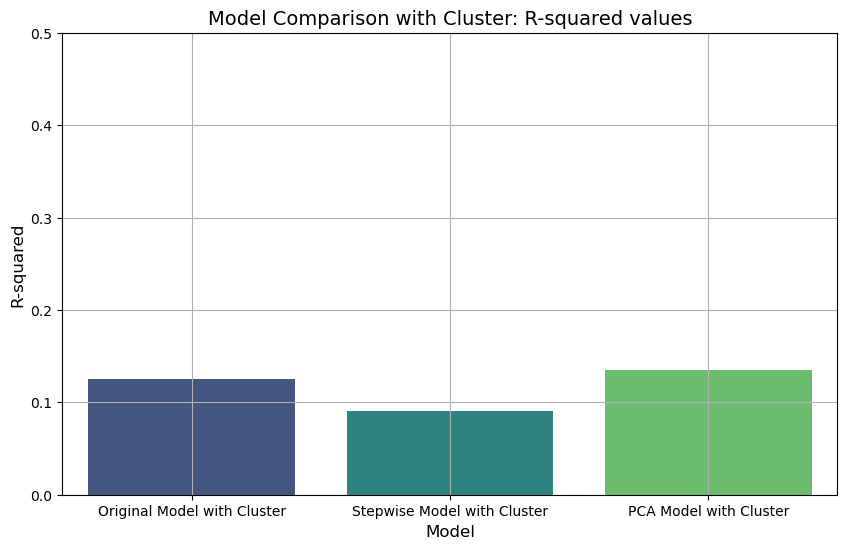

In [30]:
# Compare R-squared values for all three models with cluster variables added
print(f'R-squared for Original Model with Cluster: {r2_with_clusters_orig}')
print(f'R-squared for Stepwise Model with Cluster: {r2_with_clusters_stepwise}')
print(f'R-squared for PCA Model with Cluster: {r2_pca}')

# Create a DataFrame to hold R-squared values for comparison
model_comparison_with_clusters = pd.DataFrame({
    'Model': ['Original Model with Cluster', 'Stepwise Model with Cluster', 'PCA Model with Cluster'],
    'R-squared': [r2_with_clusters_orig, r2_with_clusters_stepwise, r2_pca]
})

# Plot comparison of R-squared for each model with cluster variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=model_comparison_with_clusters, palette='viridis')
plt.title('Model Comparison with Cluster: R-squared values', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.ylim(0, 0.5)  # Scale the Y-axis to 0.5 for better display
plt.grid(True)
plt.show()